In [181]:
import numpy as np
import matplotlib.pyplot as plt

In [182]:
np.random.seed(2)
def SGD(X, y, lam=0, epochs=1000, l_rate=0.01, sgd_type="practical"):
    np.random.seed(2)
    m = X.shape[0]
    d = X.shape[1]
    w = np.random.uniform(size=d)
    b = np.random.uniform(size=1)

    if sgd_type == "theory":
        w_list = [w]
        b_list = [b]
        for _ in range(m * epochs):
            idx = np.random.randint(low=0, high=m - 1, size=1)
            v_w, v_b = sub_gradient(w, b, lam, X[idx], y[idx])
            v_w = np.reshape(v_w, (2, ))
            w = w - l_rate*v_w
            b = b - l_rate*v_b

            w_list.append(w)
            b_list.append(b)
        w_mean = np.average(w_list,axis=0)
        b_mean = np.average(b_list)
        return w_mean, b_mean
    else:
        for _ in range(epochs):
            permutation = np.random.permutation(np.arange(m))
            for i in permutation:
                v_w, v_b = sub_gradient(w, b, lam, X[i], y[i])
                w = w - l_rate*v_w
                b = b - l_rate*v_b
        return w, b[0]

In [183]:
# Returns: Vw, Vb
def sub_gradient(w,b,lam,x,y):
    if 0 > 1 - y * (np.inner(w, x) + b):
        v_w = 2*lam*w
        v_b = 0
        return v_w, v_b
    else:
        v_w = (-y * x) + (2*lam*w)
        v_b = -y
        return v_w, v_b

In [184]:
def calculate_error(w,bias,X,y):
    y_pred = [np.sign(np.inner(x, w) + bias) for x in X]
    return np.average(y_pred != y)  # error-rate


In [185]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)
X = X[y != 0]
y = y[y != 0]
y[y==2] = -1
X = X[:, 2:4]

In [186]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0)
lam_list = np.array([0, 0.05, 0.1, 0.2, 0.5])

models = [SGD(X=X_train, y=y_train, lam=l) for l in lam_list]

margins = [1 / np.linalg.norm(m[0]) for m in models]
train_error_rates = [calculate_error(w=m[0], bias=m[1], X=X_train, y=y_train) for m in models]
val_error_rates = [calculate_error(w=m[0], bias=m[1], X=X_val, y=y_val) for m in models]

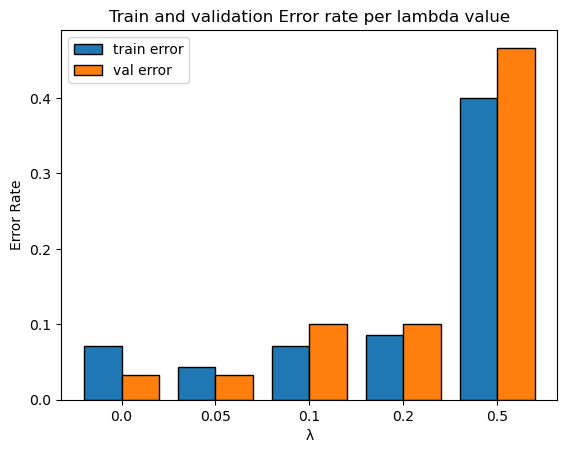

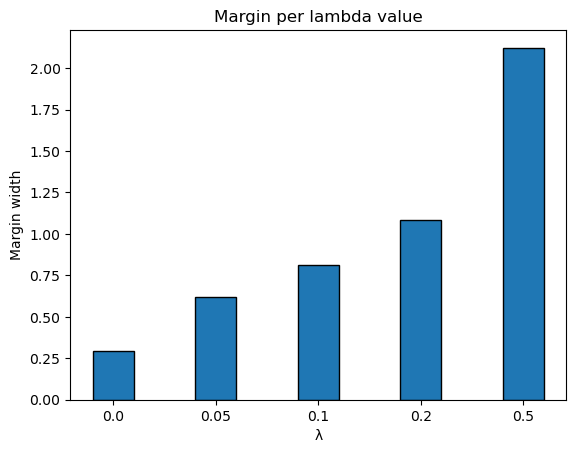

In [187]:
bar_width = 0.4
bar = np.arange(len(lam_list))

plt.bar(bar - 0.2, train_error_rates, width=bar_width, label='train error',
        edgecolor='black', align='center')
plt.bar(bar + 0.2, val_error_rates, width=bar_width, label='val error',
        edgecolor='black', align='center')
plt.xlabel('\u03BB')
plt.ylabel('Error Rate')
plt.xticks(bar, lam_list)
plt.title("Train and validation Error rate per lambda value")
plt.legend()
plt.show()

plt.bar(bar, margins, edgecolor='black', align='center', width=bar_width)
plt.xlabel('\u03BB')
plt.ylabel('Margin width')
plt.xticks(bar, lam_list)
plt.title("Margin per lambda value")

plt.show()


The second graph aligns with the fact that the margin grows linearly with lambda value, as learned in class.
As we can see, it minimizes the over-fitting as well as the under-fitting, in relation to other lambda values.
For relatively small lambda we expect the training error to be low and the validation error to be high.
For relatively large lambda we expect the training error and the validation error to be high.
For lambda value equals to 0.05 we get the best balance between validation and training error.

In [188]:
def error_per_epoch(X,y,models,sample_type,epochs):
    error_rates_practical = [calculate_error(w=m[0], bias=m[1], X=X, y=y) for m in models[0]]
    error_rates_theory = [calculate_error(w=m[0], bias=m[1], X=X, y=y) for m in models[1]]

    plt.plot(epochs,error_rates_practical, c='b', label=f'Practical SGD {sample_type} error')
    plt.plot(epochs,error_rates_theory, c='r', label=f'Theoretical SGD {sample_type} error')

    plt.xlabel('epochs')
    plt.ylabel(f'{sample_type} error Rate')
    plt.title(f'{sample_type} Error rate per epoch')
    plt.legend()
    plt.show()

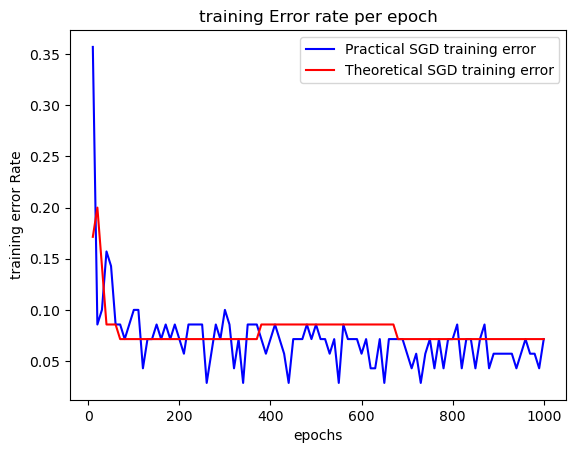

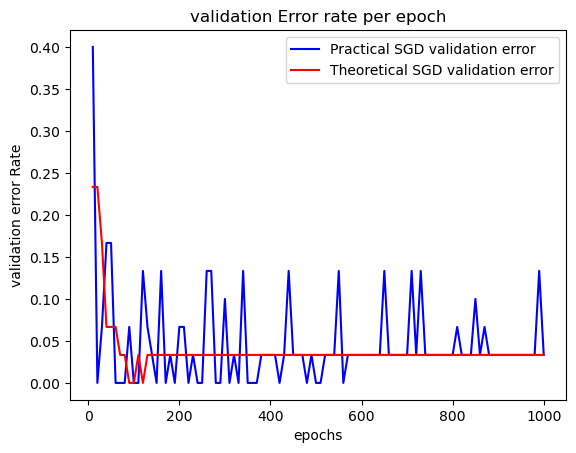

In [189]:
epochs_list = np.arange(start=10,stop=1010,step=10)
practical_models = [SGD(X=X_train, y=y_train, epochs=e) for e in epochs_list]
theoretical_models = [SGD(X=X_train, y=y_train, epochs=e,sgd_type='theory') for e in epochs_list]
models = [practical_models,theoretical_models]
#a
error_per_epoch(X_train,y_train,models,'training',epochs_list)
#b
error_per_epoch(X_val,y_val,models,'validation',epochs_list)

We can see that the Theoretical-SGD models converge while the Practical-SGD models
vary between 0.0 to 0.4 without converging, both in the training and validation sets.
This phenomena can be explained by the theorem learned in class, which states that theoretical algorithm
necessarily converges for sufficient T(iterations amount) while the practical does not.